In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sc
F = lambda x: x/2

In [2]:
### PROBLEM 1

def function_pb1(x0, f, fprime, tol, maxiters=15):
    for k in range(maxiters):
        print(x0, end='   ')
        x1 = x0 - (f(x0) / fprime(x0))
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return(x0)

f = lambda x: np.exp(x) - 2
fprime = lambda x: np.exp(x)

function_pb1(2.0, f, fprime, 1e-9, 15)
#sc.optimize.newton(2.0, f, fprime, 1e-9, 15)

2.0   1.2706705664732254   0.8319573037399686   0.7023505840171669   0.6931894022505122   0.6931471814512683   

0.6931471814512683

In [3]:
### PROBLEM 3

def function_pb3(x0, f, fprime, alpha, tol, maxiters=15):
    for k in range(maxiters):
        print(x0, end='   ')
        x1 = x0 - alpha * (f(x0) / fprime(x0))
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return(x0)

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
fprime = lambda x: (1./3)* np.sign(x) * np.power(np.abs(x), -2./3)

# Does not converge if \alpha == 1
function_pb3(0.1, f, fprime, 1, 1e-9, 15)
# Should converge, why doesn't it?
function_pb3(0.1, f, fprime, 0.3, 1e-9, 8)


0.1   -0.20000000000000004   -0.8000000000000002   -3.2000000000000006   -12.800000000000002   -51.20000000000001   -204.8   -819.1999999999998   -3276.7999999999984   -13107.19999999999   -52428.79999999994   -209715.19999999966   -838860.7999999982   -3355443.199999991   -13421772.799999956   0.1   0.009999999999999995   0.0009999999999999957   9.999999999999907e-05   9.999999999999864e-06   9.999999999999803e-07   9.999999999999756e-08   9.99999999999968e-09   

9.999999999999577e-10

In [4]:
### PROBLEM 4

# Issue with the type of the output "List is not callable"
def function_pb3(x0, f, fprime, tol, maxiters=15):
    a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    iterations = np.array([])
    for alpha in a:
        print(a)
        for k in range(maxiters):
            print(x0, end='   ')
            x1 = x0 - alpha * (f(x0) / fprime(x0))
            if abs(x1 - x0) < tol:
                break
            x0 = x1
        iterations = np.append(iterations, x1)
        print(iterations)
    return(iterations)

f = function_pb3(2.0, f, fprime, 1e-9, maxiters=15)
f

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
2.0   1.4   0.9799999999999999   0.6859999999999999   0.48019999999999996   0.33613999999999994   0.23529799999999992   0.16470859999999993   0.11529601999999993   0.08070721399999994   0.056495049799999954   0.03954653485999997   0.027682574401999976   0.019377802081399984   0.013564461456979988   [0.00949512]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
0.00949512301988599   0.0037980492079543945   0.0015192196831817569   0.0006076878732727023   0.0002430751493090807   9.72300597236322e-05   3.889202388945284e-05   1.555680955578112e-05   6.22272382231244e-06   2.4890895289249733e-06   9.95635811569988e-07   3.9825432462799465e-07   1.5930172985119768e-07   6.3720691940479e-08   2.5488276776191557e-08   [9.49512302e-03 1.01953107e-08]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
1.0195310710476604e-08   1.0195310710476508e-09   [9.49512302e-03 1.01953107e-08 1.01953107e-10]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
1.019

array([ 9.49512302e-03,  1.01953107e-08,  1.01953107e-10, -4.48593671e-10,
       -5.09765536e-10, -5.70937400e-10, -6.32109264e-10, -6.93281128e-10,
       -7.54452993e-10, -8.15624857e-10])

In [5]:
def fractal_nightmare(f, fprime, zeros, bounds, res, iters):
    
    # Step 1: construct the res*res grid X0 over the domain
    x_real = np.linspace(bounds[0], bounds[1], res)    # Real parts.
    x_imag = np.linspace(bounds[2], bounds[3], res)    # Imaginary parts.
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag                # Combine real and imaginary parts.
    
    X_k = np.zeros_like(X_0)
    
    # Step 2: run Newton's method on X_0 iters times, obtaining the res*res array Xk
    for i in range(0,len(X_0[0])):
        for j in range(0,len(X_0[1])):
            x0 = X_0[i,j]
            for k in range(iters):
                x1 = x0 - (f(x0) / fprime(x0))
                x0 = x1
            X_k[i,j] = x0

   # Step 3: create another res*res array Y
    # (i,j) th entry of Y_{i,j} : index of the closest zero of f in the array zeros
    Y = np.zeros((res, res))
    for i in range(0,len(X_k[0])):
        for j in range(0,len(X_k[1])):
            ind = X_k[i,j]
            Y[i,j] = np.argmin(abs(ind - zeros))
    
    # Step 4 : plt.pcolormesh() to visualize the basins
    plt.pcolormesh(X_real, X_imag, Y, cmap = "brg")


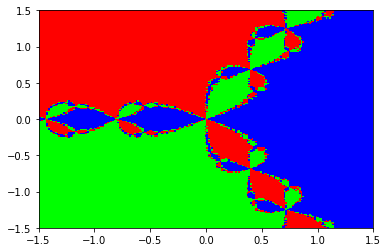

In [6]:
X0 = fractal_nightmare(lambda x: x**3 - 1, 
                  lambda x: 3*x**2,
                  [1, -0.5 +(3**0.5) * 0.5 *1j,  -0.5 - (3**0.5) * 0.5 *1j], 
                  [-1.5, 1.5, -1.5, 1.5], 200, 
                  50)

X0